## Capstone Snow Depth Project: Pre-processing and training data

### **Preprocessing and Training Data Development**

#### **Goal**
- To create a cleaned development dataset for completing the modeling step of the project.


#### **Steps**
1. **Create Dummy or Indicator Features**:
   - Transform categorical variables into dummy or indicator features.

2. **Standardize Numeric Features**:
   - Adjust the magnitude of numeric features by applying a scaler to ensure all variables are on a comparable scale.



In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime


Preprocessing and Training Data Development
    Overview
The goal of this notebook is to prepare a clean dataset for model fitting by:
- Creating dummy/indicator features for categorical variables.
- Standardizing the magnitude of numeric features.
- Splitting the dataset into training and testing sets.
- Saving the preprocessed dataset for further use.


In [6]:
#Data
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data')
file_path = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data/snow_data_cleaned.csv'
snow_data = pd.read_csv(file_path)

In [12]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
snow_data.dtypes

date                     object
station_name             object
elevation                 int64
latitude                float64
longitude               float64
snowdepth               float64
precip_accumulation     float64
precip_increment        float64
airtemp_avg             float64
airtemp_max             float64
airtemp_min             float64
airtemp_obs             float64
soiltemp_obs            float64
soilmoisture_avg        float64
soilmoisture_max        float64
soilmoisture_min        float64
soiltemp_avg            float64
soiltemp_max            float64
soiltemp_min            float64
7d_airtemp_avg          float64
7d_precip_avg           float64
7d_snowdepth_avg        float64
7d_soiltemp_avg         float64
30d_airtemp_avg         float64
30d_precip_avg          float64
30d_snowdepth_avg       float64
30d_soiltemp_avg        float64
7d_airtemp_std          float64
7d_precip_std           float64
7d_snowdepth_std        float64
7d_soiltemp_std         float64
30d_airt

In [14]:
snow_data['date'] = pd.to_datetime(snow_data['date'])
print(snow_data['date'].dtype) 

datetime64[ns]


In [18]:
winter_months = [11, 12, 1, 2, 3, 4, 5]
winter_data = snow_data[snow_data['month'].isin(winter_months)]

In [91]:
#create dummy indicator features for categorical variables 

# Create dummy variables
snow_dummies = pd.get_dummies(winter_data)
print(snow_dummies.head())


        date  elevation  latitude  longitude  snowdepth  precip_accumulation  \
0 2015-01-01       8790  40.59936 -111.58167       34.0                  9.2   
1 2015-01-02       8790  40.59936 -111.58167       33.0                  9.2   
2 2015-01-03       8790  40.59936 -111.58167       32.0                  9.2   
3 2015-01-04       8790  40.59936 -111.58167       31.0                  9.2   
4 2015-01-05       8790  40.59936 -111.58167       31.0                  9.3   

   precip_increment  airtemp_avg  airtemp_max  airtemp_min  airtemp_obs  \
0               0.0         17.8         28.2         11.3         14.7   
1               0.0         19.6         31.8         13.6         16.5   
2               0.0         19.4         25.5         12.9         21.0   
3               0.1         26.1         34.9         13.3         13.8   
4               0.0         34.3         39.0         30.2         30.9   

   soiltemp_obs  soilmoisture_avg  soilmoisture_max  soilmoisture_mi

In [95]:
print(snow_dummies.columns)

Index(['date', 'elevation', 'latitude', 'longitude', 'snowdepth',
       'precip_accumulation', 'precip_increment', 'airtemp_avg', 'airtemp_max',
       'airtemp_min', 'airtemp_obs', 'soiltemp_obs', 'soilmoisture_avg',
       'soilmoisture_max', 'soilmoisture_min', 'soiltemp_avg', 'soiltemp_max',
       'soiltemp_min', '7d_airtemp_avg', '7d_precip_avg', '7d_snowdepth_avg',
       '7d_soiltemp_avg', '30d_airtemp_avg', '30d_precip_avg',
       '30d_snowdepth_avg', '30d_soiltemp_avg', '7d_airtemp_std',
       '7d_precip_std', '7d_snowdepth_std', '7d_soiltemp_std',
       '30d_airtemp_std', '30d_precip_std', '30d_snowdepth_std',
       '30d_soiltemp_std', '7d_airtemp_var', '7d_precip_var',
       '7d_snowdepth_var', '7d_soiltemp_var', '30d_airtemp_var',
       '30d_precip_var', '30d_snowdepth_var', '30d_soiltemp_var',
       '7d_airtemp_sum', '7d_precip_sum', '7d_snowdepth_sum',
       '7d_soiltemp_sum', '30d_airtemp_sum', '30d_precip_sum',
       '30d_snowdepth_sum', '30d_soiltemp_sum', '

In [101]:
for col in snow_dummies.select_dtypes(include=['bool']).columns:
    snow_dummies[col] = snow_dummies[col].astype(int)

print(snow_dummies.head())

        date  elevation  latitude  longitude  snowdepth  precip_accumulation  \
0 2015-01-01       8790  40.59936 -111.58167       34.0                  9.2   
1 2015-01-02       8790  40.59936 -111.58167       33.0                  9.2   
2 2015-01-03       8790  40.59936 -111.58167       32.0                  9.2   
3 2015-01-04       8790  40.59936 -111.58167       31.0                  9.2   
4 2015-01-05       8790  40.59936 -111.58167       31.0                  9.3   

   precip_increment  airtemp_avg  airtemp_max  airtemp_min  airtemp_obs  \
0               0.0         17.8         28.2         11.3         14.7   
1               0.0         19.6         31.8         13.6         16.5   
2               0.0         19.4         25.5         12.9         21.0   
3               0.1         26.1         34.9         13.3         13.8   
4               0.0         34.3         39.0         30.2         30.9   

   soiltemp_obs  soilmoisture_avg  soilmoisture_max  soilmoisture_mi

In [32]:
missing_data = winter_data.isnull().sum()
print(missing_data)

date                    0
station_name            0
elevation               0
latitude                0
longitude               0
snowdepth               0
precip_accumulation     0
precip_increment        0
airtemp_avg             0
airtemp_max             0
airtemp_min             0
airtemp_obs             0
soiltemp_obs            0
soilmoisture_avg        0
soilmoisture_max        0
soilmoisture_min        0
soiltemp_avg            0
soiltemp_max            0
soiltemp_min            0
7d_airtemp_avg          0
7d_precip_avg           0
7d_snowdepth_avg        0
7d_soiltemp_avg         0
30d_airtemp_avg         0
30d_precip_avg          0
30d_snowdepth_avg       0
30d_soiltemp_avg        0
7d_airtemp_std          0
7d_precip_std           0
7d_snowdepth_std        0
7d_soiltemp_std         0
30d_airtemp_std         0
30d_precip_std          0
30d_snowdepth_std       0
30d_soiltemp_std        0
7d_airtemp_var          0
7d_precip_var           0
7d_snowdepth_var        0
7d_soiltemp_

In [103]:
missing_data_dum = snow_dummies.isnull().sum()
print(missing_data_dum)

date                         0
elevation                    0
latitude                     0
longitude                    0
snowdepth                    0
precip_accumulation          0
precip_increment             0
airtemp_avg                  0
airtemp_max                  0
airtemp_min                  0
airtemp_obs                  0
soiltemp_obs                 0
soilmoisture_avg             0
soilmoisture_max             0
soilmoisture_min             0
soiltemp_avg                 0
soiltemp_max                 0
soiltemp_min                 0
7d_airtemp_avg               0
7d_precip_avg                0
7d_snowdepth_avg             0
7d_soiltemp_avg              0
30d_airtemp_avg              0
30d_precip_avg               0
30d_snowdepth_avg            0
30d_soiltemp_avg             0
7d_airtemp_std               0
7d_precip_std                0
7d_snowdepth_std             0
7d_soiltemp_std              0
30d_airtemp_std              0
30d_precip_std               0
30d_snow

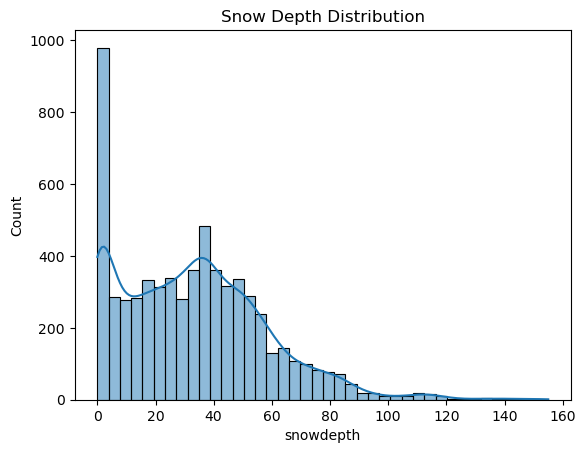

In [69]:
sns.histplot(winter_data['snowdepth'], kde=True)
plt.title("Snow Depth Distribution")
plt.show()

In [49]:
#For using algorithms sensitive to scale:
#Standardize the magnitude of numeric features using scaler
scaler = StandardScaler()

snow_numeric = winter_data[['elevation','snowdepth', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soilmoisture_avg', '7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max', 'month', 'year']]
scaled_snow = scaler.fit_transform(snow_numeric)
scaled_snow = pd.DataFrame(scaled_snow, columns=snow_numeric.columns)
print(scaled_snow.head())

   elevation  snowdepth  precip_accumulation  precip_increment  airtemp_obs  \
0    0.61029   0.046304            -0.716459         -0.519967    -1.218678   
1    0.61029   0.006381            -0.716459         -0.519967    -1.054878   
2    0.61029  -0.033542            -0.716459         -0.519967    -0.645376   
3    0.61029  -0.073464            -0.716459         -0.130359    -1.300579   
4    0.61029  -0.073464            -0.707228         -0.519967     0.255527   

   airtemp_avg  airtemp_max  airtemp_min  soiltemp_obs  soiltemp_avg  \
0    -1.179431    -1.010578    -1.077930     -0.170117     -0.124590   
1    -1.016337    -0.710519    -0.861962     -0.170117     -0.124590   
2    -1.034459    -1.235622    -0.927691     -0.170117     -0.124590   
3    -0.427389    -0.452134    -0.890132     -0.170117     -0.124590   
4     0.315593    -0.110400     0.696760     -0.445811     -0.487919   

   soilmoisture_avg  7d_airtemp_avg  7d_airtemp_std  7d_airtemp_var  \
0          1.343944  

In [37]:
print(winter_data.head())

        date station_name  elevation  latitude  longitude  snowdepth  \
0 2015-01-01     Brighton       8790  40.59936 -111.58167       34.0   
1 2015-01-02     Brighton       8790  40.59936 -111.58167       33.0   
2 2015-01-03     Brighton       8790  40.59936 -111.58167       32.0   
3 2015-01-04     Brighton       8790  40.59936 -111.58167       31.0   
4 2015-01-05     Brighton       8790  40.59936 -111.58167       31.0   

   precip_accumulation  precip_increment  airtemp_avg  airtemp_max  \
0                  9.2               0.0         17.8         28.2   
1                  9.2               0.0         19.6         31.8   
2                  9.2               0.0         19.4         25.5   
3                  9.2               0.1         26.1         34.9   
4                  9.3               0.0         34.3         39.0   

   airtemp_min  airtemp_obs  soiltemp_obs  soilmoisture_avg  soilmoisture_max  \
0         11.3         14.7          34.0            31.621      

In [53]:
#Overview questions:
#Does my dataset have any categorical data? Yes: station_names
#Do my features have data values that range from 0-100 or 0-1 or both and more? snow ranges from 0 - 155 ; most other features range from 0-100 ; no binary variables unless provided dummy values

print(winter_data.dtypes)

date                    datetime64[ns]
station_name                    object
elevation                        int64
latitude                       float64
longitude                      float64
snowdepth                      float64
precip_accumulation            float64
precip_increment               float64
airtemp_avg                    float64
airtemp_max                    float64
airtemp_min                    float64
airtemp_obs                    float64
soiltemp_obs                   float64
soilmoisture_avg               float64
soilmoisture_max               float64
soilmoisture_min               float64
soiltemp_avg                   float64
soiltemp_max                   float64
soiltemp_min                   float64
7d_airtemp_avg                 float64
7d_precip_avg                  float64
7d_snowdepth_avg               float64
7d_soiltemp_avg                float64
30d_airtemp_avg                float64
30d_precip_avg                 float64
30d_snowdepth_avg        

In [105]:
#Split into testing and training datasets using dummy variables
X = snow_dummies  # Features
y = winter_data['snowdepth']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
X_train.shape, X_test.shape

((5095, 79), (1274, 79))

In [109]:
y_train.shape, y_test.shape

((5095,), (1274,))

In [111]:
train_mean = y_train.mean()
train_mean

32.88851815505397

In [113]:
#Test the mean indicator 

dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_
y_pred_dummy = dumb_reg.predict(X_test)


print(f"Baseline Mean Squared Error: {mean_squared_error(y_test, y_pred_dummy)}")

Baseline Mean Squared Error: 627.366954370943


Larger MSE! Suggests significant variance between predictions and actual values, meaning the baseline model struggles to represent your data accurately.

In [117]:
scaled_data = pd.concat([scaled_snow, snow_dummies], axis=1)

Is this a better practice Use a consistent train-test split or cross-validation for fair comparison between models.
code for this method: 
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('model', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)

In [119]:
train_data = pd.concat([X_train, y_train], axis=1)

test_data = pd.concat([X_test, y_test], axis=1)

#  'Split' column for identification
train_data['Split'] = 'train'
test_data['Split'] = 'test'

combined_data = pd.concat([train_data, test_data])



In [121]:
datapath = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data'


combined_data.to_csv(os.path.join(datapath, 'combined_data.csv'), index=False)
print("Combined dataset saved successfully!")

snow_dummies.to_csv(os.path.join(datapath, 'preprocessed_data.csv'), index=False)
print("Preprocessed data saved successfully!")
scaled_data.to_csv(os.path.join(datapath, 'scaled_data.csv'), index= False)

processed_data.to_csv('processed_data.csv', index=False)  
processed_data.to_pickle('processed_data.pkl')  

Combined dataset saved successfully!
Preprocessed data saved successfully!
